In [1]:
from sys import path
#path.append('/Users/qdi/Projects/cap/clang-3.7.0/install/opt/cap/python')
path.append('/Users/qdi/Projects/cap/clang-3.7.0/build/opt/cap/python')
import pycap
print pycap.__git_commit_hash__

2168a65592c010d82513f08af3343083281a8e9e


# Cyclic voltammetry

Cyclic voltammetry is a widely-used electrochemical technique to investigate energy storage devices.
It consists in measuring the current while varying linearly the voltage back and forth over a given range.

The voltage sweep applied to the device creates a current given by
\begin{equation}
I = C \frac{dU}{dt}
\end{equation}
where $I$ is the current in ampere and $\frac{dU}{dt}$ is the scan rate of the voltage ramp.

The voltage scan rates for testing energy storage devices are usually 
between $0.1\ \mathrm{mV/s}$ and $\mathrm{1\ V/s}$.
Scan rates at the lower end of this range allow slow processes to occur; fast scans often show lower capacitance than slower scans and may produce large currents on high-value capacitors.

Four parameters define the CV sweep range:
The scan starts at `initial_voltage`, ramps to `scan_limit_1`, reverses and goes to `scan_limit_2`.
Additional cycles start and end at `scan_limit_2`. The scan ends at `final_voltage`.
The rate of voltage change over time $\frac{dU}{dt}$ is specified using `scan_rate` which is here set to $100\ \mathrm{mV/s}$. The sweep range is [$2.4\ \mathrm{V}$, $-0.5\ \mathrm{V}$]. The scan both starts and finishes at $0\ \mathrm{V}$. The linear ramp is imposed in increments of $5\ \mathrm{mV}$.

In [2]:
from pycap import PropertyTree,EnergyStorageDevice,CyclicVoltammetry

# setup the experiment
ptree=PropertyTree()
ptree.put_double('initial_voltage',0)
ptree.put_double('final_voltage',0)
ptree.put_double('scan_limit_1',2.4)
ptree.put_double('scan_limit_2',-0.5)
ptree.put_double('scan_rate',100e-3)
ptree.put_double('step_size',5e-3)
ptree.put_int   ('cycles',2)

cv=CyclicVoltammetry(ptree)

Four parameters define the CV sweep range:
The scan starts at `initial_voltage`, ramps to `scan_limit_1`, reverses and goes to `scan_limit_2`.
Additional cycles start and end at `scan_limit_2`. The scan ends at `final_voltage`.
Here, the sweep range is [$2.4\ \mathrm{V}$, $-0.5\ \mathrm{V}$]. It both starts and finishes at $0\ \mathrm{V}$.

The rate of voltage change over time $\frac{dU}{dt}$ is specified using `scan_rate` which is here set to $100\ \mathrm{mV/s}$. The linear ramp is imposed in increments of $5\ \mathrm{mV}$. The number of sweep is controlled by `cycles`.

Here we run the experiment with a $3\ \mathrm{F}$ capacitor in series with a $50\ \mathrm{m\Omega}$ resistor.

2324 steps


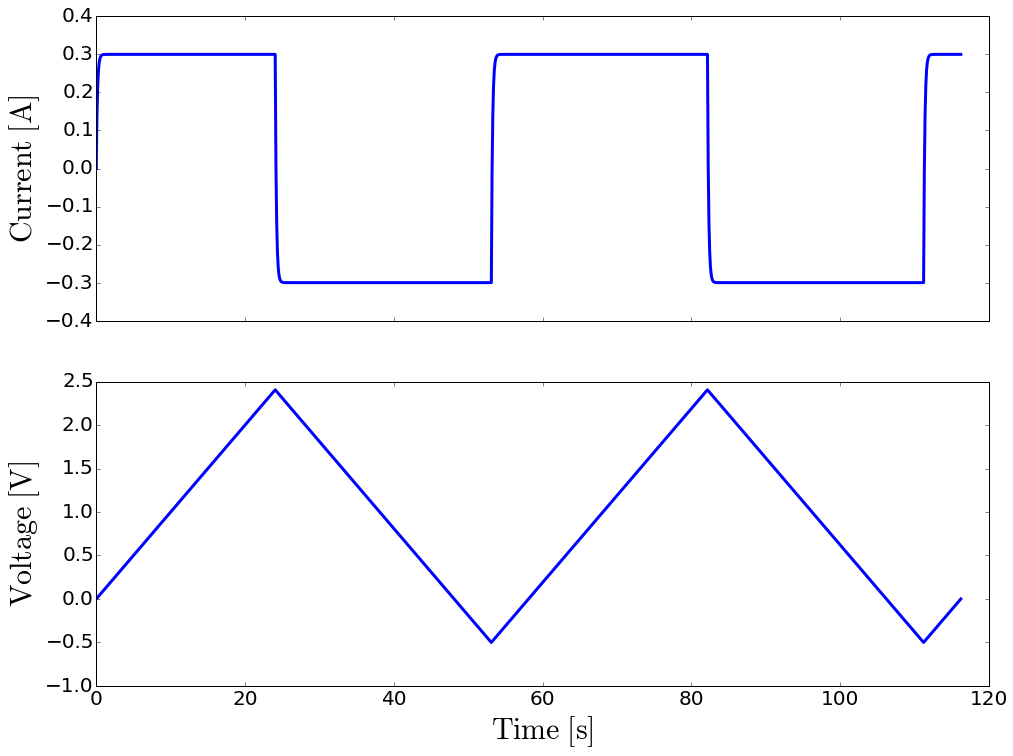

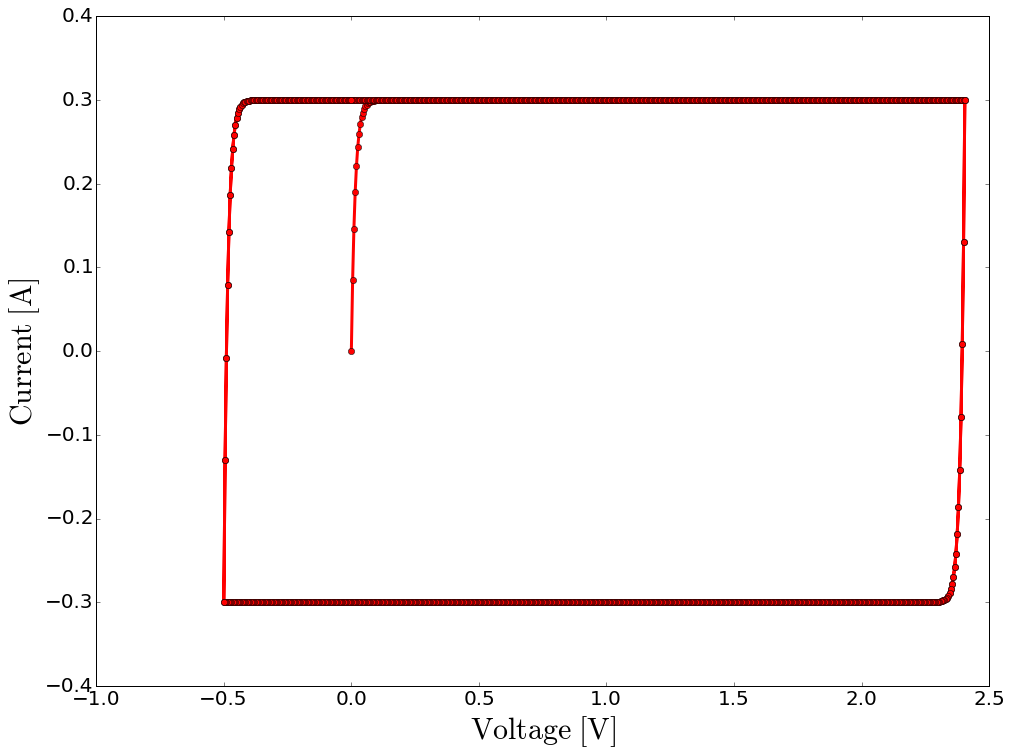

In [3]:
# build an energy storage device
ptree=PropertyTree()
ptree.put_string('type','SeriesRC')
ptree.put_double('capacitance',3)
ptree.put_double('series_resistance',50e-3)
device=EnergyStorageDevice(ptree)

from pycap import initialize_data,report_data,plot_data
from pycap import plot_cyclic_voltammogram

# run the experiment and visualize the measured data
data=initialize_data()
steps=cv.run(device,data)

print "%d steps"%steps

%matplotlib inline
plot_data(data)
plot_cyclic_voltammogram(data)


On the CV plot (current on the y-axis and voltage on the x-axis), we read
\begin{equation}
I = C \frac{dU}{dt} = 300\ \mathrm{mA}
\end{equation}
as expected for a $3\ \mathrm{F}$ capacitor. For an ideal capacitor (i.e. no equivalent series resistance), the plot would be a perfect rectangle. The resistor causes the slow rise in the current at the scan’s start and rounds two corners of the rectangle. The time constant $\tau=RC$ controls rounding of corners.